# K-Means Clustering

Implement the K-Means clustering algorithm and apply it to compress an image.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Visualizing the data

In [2]:
X = loadmat('data/ex7data2.mat')['X']
X.shape

(300, 2)

Text(0, 0.5, '$x_2$')

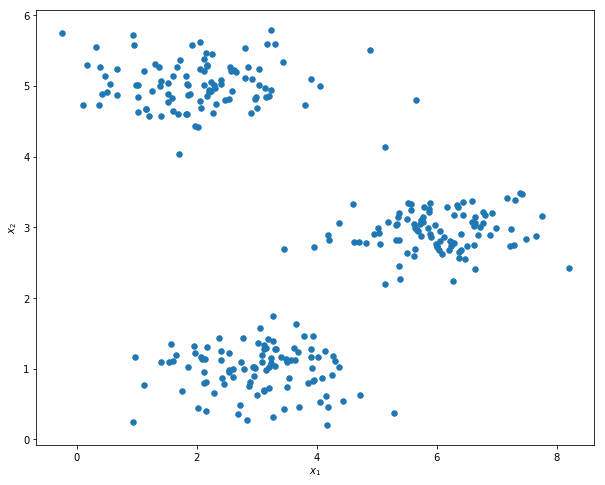

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], s=30)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

## 2 K-Means algorithm

In [4]:
def dist(p1, p2):
    return np.power(p1 - p2, 2).sum()

In [5]:
def find_closest_centroids(X, centroids):
    '''
    Assign each example to its closest centroid
    '''
    idx = np.zeros(len(X))
    
    for i in range(len(X)):
        min_dist = 1e100
        for j in range(len(centroids)):
            d = dist(X[i], centroids[j])
            if d < min_dist:
                min_dist = d
                idx[i] = j
                
    return idx

In [6]:
init_centroids = np.array([[3, 3,], [6, 2], [8, 5]])
idx = find_closest_centroids(X, init_centroids)
idx[:3] + 1

array([1., 3., 2.])

In [7]:
def compute_centroids(X, idx, k):
    '''
    Compute the mean of points based on centroid
    '''
    means = np.zeros((k, X.shape[1]))
    for i in range(k):
        indices = np.where(idx == i)[0]
        means[i] = (1 / len(indices)) * X[indices].sum(axis=0)
    return means

In [8]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
def random_init(X, k):
    idx = np.random.randint(0, len(X), k)
    return X[idx]

In [10]:
random_init(X, 3)

array([[1.53178107, 1.10054852],
       [2.12857843, 5.01149793],
       [5.64034678, 2.69385282]])

In [11]:
def k_means(X, k, centroids=None, max_iters=1000):
    if centroids is None:
        centroids = random_init(X, k)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, len(centroids))
    return idx, centroids

In [12]:
idx, centroids = k_means(X, 3, max_iters=100)
cluster = [X[np.where(idx == i)[0]] for i in range(len(centroids))]

In [13]:
def plot_cluster(cluster):
    fig, ax = plt.subplots(figsize=(12, 8))
    for i, c in enumerate(cluster):
        ax.scatter(c[:, 0], c[:, 1], s=30, label='Cluster {}'.format(i + 1))
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

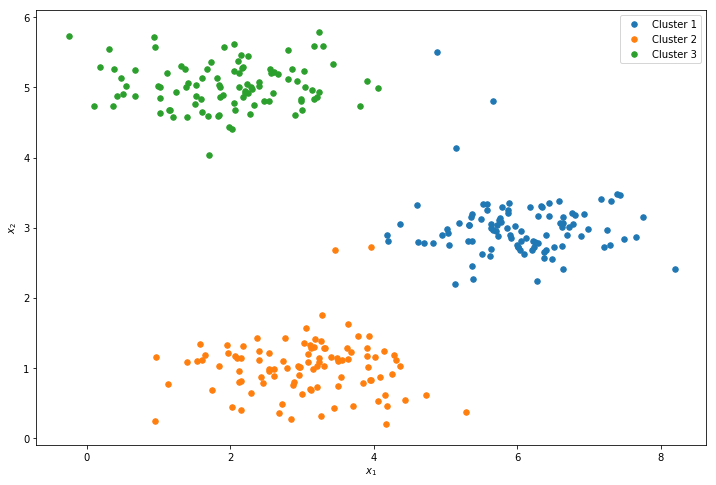

In [14]:
plot_cluster(cluster)

## 3 Image compression with K-Means

Use K-Means algorithm to compress image.

Reduce the number of colors to 16 colors.

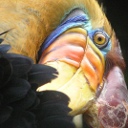

In [15]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [21]:
src = loadmat('data/bird_small.mat')['A']

# Reshape pixels from 128 x 128 to 16384
pixels = src.reshape((src.shape[0] * src.shape[1], src.shape[2]))

# Normalize the pixels
pixels = pixels / 255

pixels.shape

(16384, 3)

In [22]:
def image_compress(pixels):
    _, centroids = k_means(pixels, 16, max_iters=10)
    idx = find_closest_centroids(pixels, centroids).astype(int)
    return centroids[idx, :]

In [23]:
compress = image_compress(pixels)

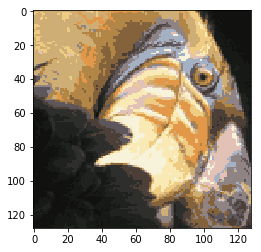

In [24]:
compress = compress.reshape(src.shape[0], src.shape[1], src.shape[2])
plt.imshow(compress)